In [5]:
import numpy as np
import os, cv2, torch, config
import matplotlib.pyplot as plt

from evaluation.extract_hpatches import MultiScaleFeatureExtractor
from training.model.REKD import REKD, count_model_parameters


In [6]:
args = config.get_config(jupyter=True)
# args.load_dir = 'trained_models/pretrained_nets/RelKD_default_1003_111441_group36_f2_s2_t2_p3.log/best_model.pt'

args.load_dir =  'trained_models/release_group36_f2_s2_t2.log/best_model.pt'
extractor = MultiScaleFeatureExtractor(args, "demo", 'demo')

device = torch.device('cuda')

model = REKD(args, device)
model = model.to(device) ## use GPU
model.load_state_dict(torch.load(args.load_dir))  ## Load the PyTorch learnable model parameters.

print("Model paramter : {} is loaded.".format( args.load_dir ))
count_model_parameters(model)

Descriptor extraction method :  hardnet
Extract features at : extracted_features/demo
Model paramter : trained_models/release_group36_f2_s2_t2_p3.log/best_model.pt is loaded.
================ List of Learnable model parameters ================ 
module.block1.0.weights torch.Size([22])
module.block1.1.batch_norm_[36].weight torch.Size([2])
module.block1.1.batch_norm_[36].bias torch.Size([2])
module.block2.0.weights torch.Size([1584])
module.block2.1.batch_norm_[36].weight torch.Size([2])
module.block2.1.batch_norm_[36].bias torch.Size([2])
module.block3.0.weights torch.Size([1584])
module.block3.1.batch_norm_[36].weight torch.Size([2])
module.block3.1.batch_norm_[36].bias torch.Size([2])
module.ori_learner.0.weights torch.Size([72])
module.last_layer_learner.0.weight torch.Size([6])
module.last_layer_learner.0.bias torch.Size([6])
module.last_layer_learner.1.weight torch.Size([1, 6, 1, 1])
module.last_layer_learner.1.bias torch.Size([1])
The number of learnable parameters : 3293 


In [7]:
extractor.extract_hpatches(model)

Extract v_laptop/6.ppm: 100%|██████████| 24/24 [03:57<00:00,  9.89s/it]   


In [8]:
sequence = 'v_boat'

dataset_path = args.hpatches_path
feature_path = os.path.join(extractor.get_save_feat_dir(), args.hpatches_path)

image_name1 = os.path.join(sequence, '1.ppm')
image_name2 = os.path.join(sequence, '4.ppm')

kp1_path = os.path.join(feature_path, image_name1 + '.kpt.npy')
kp2_path = os.path.join(feature_path, image_name2 + '.kpt.npy')

image_path1 = os.path.join(dataset_path, image_name1)
image_path2 = os.path.join(dataset_path, image_name2)

In [9]:
img1 = cv2.imread(image_path1)
img2 = cv2.imread(image_path2)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

kp1 = np.load(kp1_path)
kp2 = np.load(kp2_path)

print(kp1.shape, kp2.shape)

(1500, 5) (1500, 5)


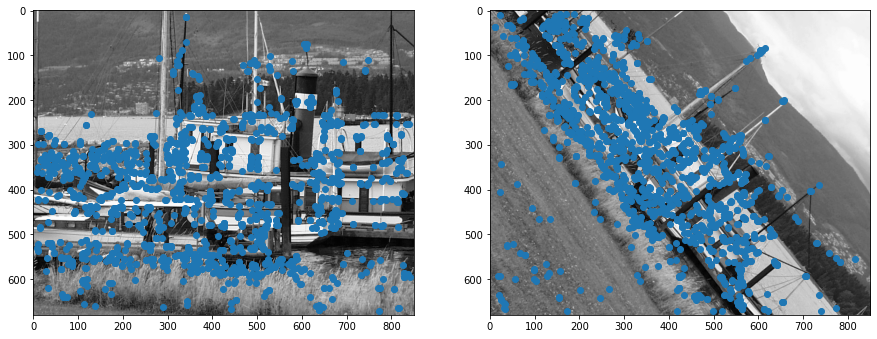

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.scatter(x= kp1[:, 0], y=kp1[:, 1])

plt.subplot(1,2,2)
plt.imshow(img2)
plt.scatter(x= kp2[:, 0], y=kp2[:, 1])
plt.show()

(1500, 5) (1500, 5)
